In [71]:
import sys
sys.path.append('./models/')
from Arima import ARIMA_Model, VAR_m
from SIRD  import *
from exponential_regression import ExponentialRegression, MultiDimensionalExponentialRegression
from moving_average import MovingAverage, MovingAverageMulti
from Truth import Truth
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from evaluate_model import evaluate_model, evaluate_model_multi
import json

df = pd.read_csv('deaths_and_infections.csv')

# remove a columns from a df: 
df.drop(columns=['Unnamed: 0'], inplace=True)
new_deaths=np.array(df['new_deaths'])
n_infected=np.array(df['n_infected'])
death_cumul=np.array([sum(new_deaths[:i]) for i in range(len(new_deaths))])
dates_of_pandemic=np.arange(len(new_deaths))

In [72]:
# importing mobility from the csv file
df_mobility=pd.read_csv('mobility.csv')
df_mobility.drop(columns=['Unnamed: 0'], inplace=True)
mobility=np.array(df_mobility['mobility'])


df = pd.read_csv('deaths_and_infections.csv')
relier_les_points=[]
for i in range(len(mobility)): 
    if i + 7 < len(mobility): 
        if i % 7 ==0:
            relier_les_points.append(mobility[i])
        else: 
            decalage=i-7*(i//7)
            res = (1-decalage/7)*mobility[7*(i//7)] + (decalage/7)*mobility[7*(i//7)+7]

            relier_les_points.append(res)
    else:
        relier_les_points.append(mobility[i])
mobility_smoothed=np.array(relier_les_points)
data3D=np.array([new_deaths, n_infected, mobility_smoothed])

In [73]:
models1D=['Arima', 'Exponential Regression', 'Moving Average', 'SIRD']
models3D=['Moving Average multi', 'SIRD multi 1', 'SIRD multi 2', 'VAR', 'Exp. Reg. Multi']

In [74]:
myarima=ARIMA_Model()
myexp=ExponentialRegression()
myexpmulti=MultiDimensionalExponentialRegression()
mymoving=MovingAverage()
mysird=SIRD_model_2()
mysird.choose_model(True, True)
mysirdmulti1=Multi_SIRD_model()
mysirdmulti1.choose_model(True, True, True)
mysirdmulti2=Multi_SIRD_model()
mysirdmulti2.choose_model(True, True, False)
myvar=VAR_m()
mymovingmulti=MovingAverageMulti()
alphas=np.array([0.02, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
indexs_points=[[30], [40], [50], [60], [70], [80], [90], [100], [110]]
reach=7
weights=np.concatenate((np.array([0.5]), alphas * 0.5))
dicoresults1D=dict()
dicoresults3D=dict()

if False: 
    for index_points in indexs_points:
        ############### 1D
        try: 
            perf_arima=evaluate_model(model=myarima, data=new_deaths, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights)
        except: 
            perf_arima = np.inf
        try: 
            perf_exp=evaluate_model(model=myexp, data=new_deaths, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights)
        except:
            perf_exp=np.inf
        try: 
            perf_moving=evaluate_model(model=mymoving, data=new_deaths, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights) 
        except: 
            perf_moving = np.inf
        try : 
            perf_sird=evaluate_model(model=mysird, data=new_deaths, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights)
        except :
            perf_sird=np.inf

        ### 




        try : 
            perfmovingmulti=evaluate_model_multi(model=mymovingmulti, data=data3D, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights)
        except : 
            perfmovingmulti=np.inf
        try : 
            perf_sirdmulti1=evaluate_model_multi(model=mysirdmulti1, data=data3D, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights)
        except : 
            perf_sirdmulti1 = np.inf
        try : 
            perf_sirdmulti2=evaluate_model_multi(model=mysirdmulti2, data=data3D, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights)
        except: 
            perf_sirdmulti2 = np.inf
        try : 
            perfvar=evaluate_model_multi(model=myvar, data=data3D, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights)
        except : 
            perfvar=np.inf
        try : 
            perfexpmulti=evaluate_model_multi(model=myexpmulti, data=data3D, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights)
        except: 
            perfexpmulti = np.inf
        
        
        dicoresults1D[str(index_points)]=[perf_arima,perf_exp,  perf_moving, perf_sird]
        dicoresults3D[str(index_points)]=[perfmovingmulti, perf_sirdmulti1, perf_sirdmulti2, perfvar, perfexpmulti]
        
    # write results: 
    with open('./results/comparing_models1D_reach=7.json', 'w') as f:
        json.dump(dicoresults1D, f)
    with open('./results/comparing_models3D_reach=7.json', 'w') as f:
        json.dump(dicoresults3D, f)

Taking I into account
shifting
variation of shift1
Taking I into account
shifting
variation of shift2


In [206]:
# load results: 
with open('./results/comparing_models1D_reach=7.json', 'r') as f:
    dicoresults1D = json.load(f)

In [205]:
# load results: 
with open('./results/comparing_models3D_reach=7.json', 'r') as f:
    dicoresults3D = json.load(f)

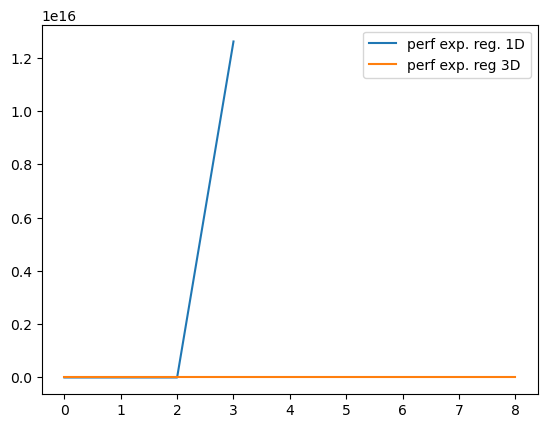

In [222]:
plt.plot([dicoresults1D[key][1] for key in dicoresults1D.keys()], label='perf exp. reg. 1D')
plt.plot([dicoresults3D[key][4] for key in dicoresults3D.keys()], label='perf exp. reg 3D')
plt.legend()

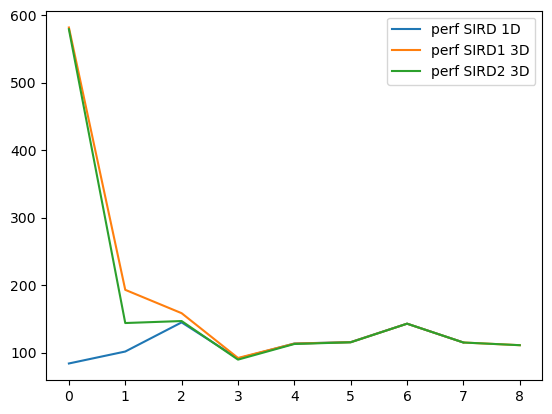

In [220]:
plt.plot([dicoresults1D[key][3] for key in dicoresults1D.keys()], label='perf SIRD 1D')
plt.plot([dicoresults3D[key][1] for key in dicoresults3D.keys()], label='perf SIRD1 3D')
plt.plot([dicoresults3D[key][2] for key in dicoresults3D.keys()], label='perf SIRD2 3D')
plt.legend()

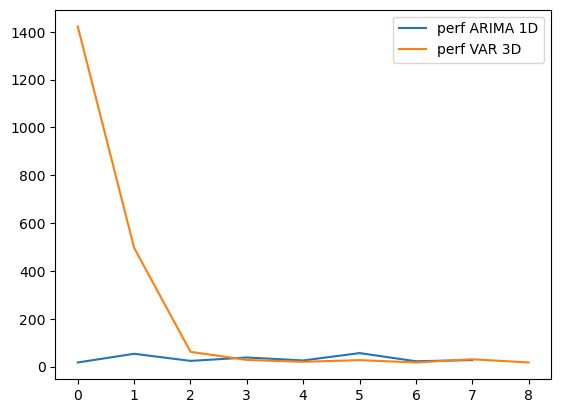

In [217]:
plt.plot([dicoresults1D[key][0] for key in dicoresults1D.keys()], label='perf ARIMA 1D')
plt.plot([dicoresults3D[key][3] for key in dicoresults3D.keys()], label='perf VAR 3D')
plt.legend()

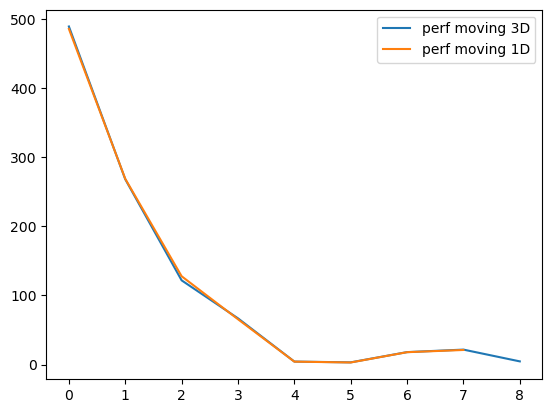

In [214]:
plt.plot([dicoresults3D[key][0] for key in dicoresults3D.keys()], label='perf moving 3D')
plt.plot([dicoresults1D[key][2] for key in dicoresults1D.keys()], label='perf moving 1D')
plt.legend()

In [207]:
dicoresults1D

{'[30]': [17.128068743346493,
  7621.813337606209,
  485.4409130882505,
  83.90735348718364],
 '[40]': [53.50742722757251,
  1248.1067864773254,
  268.59604834712303,
  101.61591538433126],
 '[50]': [23.79816053727336,
  134118002415.93279,
  127.73757975631392,
  144.80514947982348],
 '[60]': [37.94440607875382,
  1.2603977543591746e+16,
  65.55906687404355,
  91.21961841277651],
 '[70]': [25.55086818127683, inf, 4.273571129883561, 113.50184011610055],
 '[80]': [56.35172370650356, inf, 3.050650555733547, 115.5193028545674],
 '[90]': [22.271282540986732, inf, 17.931038568078307, 142.90791213829465],
 '[100]': [27.200701618467736, inf, 21.147665348764207, 114.98237301620105]}

Text(0.5, 1.0, 'Points of evaluation and best 3D models for a 7-days ahead prediction')

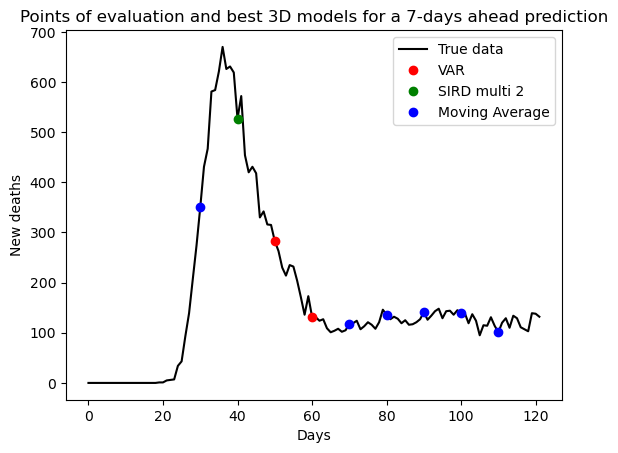

In [82]:
plt.plot(new_deaths, label='True data', c='black')
plt.plot([ 50, 60], new_deaths[[ 50, 60]], 'ro', label='VAR')
plt.plot([40], new_deaths[[40]], 'go', label= 'SIRD multi 2')
plt.plot( [70, 80, 30,90, 100,  110], new_deaths[ [70, 80, 30, 90,  100, 110]], 'bo', label= 'Moving Average')
# plt.plot([100], new_deaths[100], 'yo', label='Exp. Reg. Multi')
plt.legend()
plt.xlabel('Days')
plt.ylabel('New deaths')
plt.title('Points of evaluation and best 3D models for a 7-days ahead prediction')

Text(0.5, 1.0, 'Points of evaluation and best 3D models for a 14-days ahead prediction')

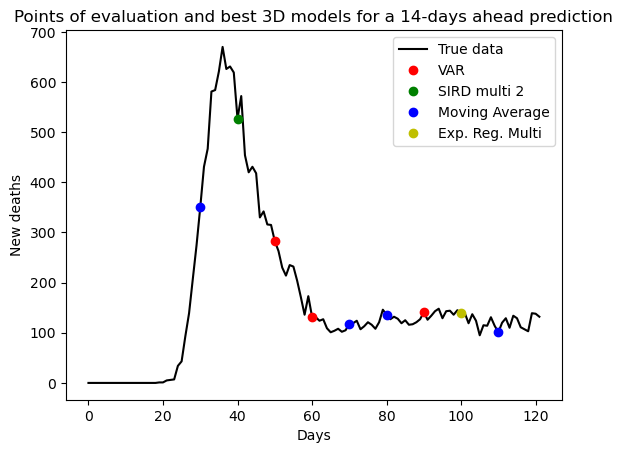

In [85]:
plt.plot(new_deaths, label='True data', c='black')
plt.plot([ 50, 60, 90], new_deaths[[ 50, 60, 90]], 'ro', label='VAR')
plt.plot([40], new_deaths[[40]], 'go', label= 'SIRD multi 2')
plt.plot( [70, 80, 30,   110], new_deaths[ [70, 80, 30,    110]], 'bo', label= 'Moving Average')
plt.plot([100], new_deaths[100], 'yo', label='Exp. Reg. Multi')
plt.legend()
plt.xlabel('Days')
plt.ylabel('New deaths')
plt.title('Points of evaluation and best 3D models for a 14-days ahead prediction')

In [99]:
def convert_percentage_array_to_floats(array):
    converted_array = []
    for item in array:
        item = item.replace('%', '')  # Remove the '%' symbol
        item = float(item) / 100.0  # Convert the string to float and divide by 100
        converted_array.append(item)
    return converted_array



In [176]:

def solve (f, interval, obj): 
    curve = lambda x : (f(x)-obj)**2
    res = minimize(curve,obj,  bounds=scipy.optimize.Bounds(interval[0], interval[1]))
    # print(curve(res.x))
    return res.x



def compute_confidence_interval(prop_obs, n_pop): 
    f1 = lambda p, n : p - np.sqrt(p*(1-p)/n)*1.96
    f2 = lambda p, n : p + np.sqrt(p*(1-p)/n)*1.96
    p_sup=solve( lambda  x :  f1(x, n_pop), [0, 1], prop_obs )
    p_inf=solve( lambda  x :  f2(x, n_pop), [0, 1], prop_obs )
    return p_inf, p_sup


In [98]:
import pandas as pd
df=pd.read_csv('test.csv')
print(df.columns)
# keep only the columns that are interesting: 
df.drop(columns=[ 'LO', 'NPA', 'PCF', 
        'ND', 'PRG', 'EAC', 'EP','AR / RES', 'TEM - AC',
       'LP', 'DLF',  'UPR', 'PA', 'Autres'], inplace=True)
np.array(df['Échantillon'])

new_df=pd.DataFrame()
new_df['Echantillon']=df['Échantillon']

for name in df.columns: 
    if name not in ['Institut', 'Date', 'Échantillon']: 
        new_df[name]=convert_percentage_array_to_floats(np.array(df[name]))
        print(convert_percentage_array_to_floats(np.array(df[name])))

new_df

Index(['Institut', 'Date', 'Échantillon', 'LO', 'NPA', 'PCF', 'LFI', 'PS PP',
       'EELV', 'ND', 'PRG', 'EAC', 'EP', 'ENS', 'AR / RES', 'TEM - AC', 'LR',
       'LP', 'DLF', 'RN', 'REC', 'UPR', 'PA', 'Autres'],
      dtype='object')
[0.08, 0.085, 0.07, 0.08, 0.085, 0.085, 0.075, 0.08, 0.07, 0.07, 0.07, 0.065, 0.09, 0.06, 0.08, 0.075, 0.08, 0.07, 0.08, 0.07]
[0.135, 0.13, 0.14, 0.13, 0.14, 0.12, 0.135, 0.13, 0.14, 0.145, 0.12, 0.13, 0.13, 0.14, 0.125, 0.13, 0.13, 0.14, 0.13, 0.12]
[0.06, 0.06, 0.07, 0.065, 0.055, 0.08, 0.07, 0.06, 0.07, 0.075, 0.07, 0.08, 0.06, 0.06, 0.065, 0.08, 0.07, 0.065, 0.06, 0.075]
[0.17, 0.155, 0.16, 0.16, 0.15, 0.165, 0.165, 0.155, 0.17, 0.16, 0.155, 0.17, 0.16, 0.18, 0.16, 0.175, 0.18, 0.17, 0.16, 0.17]
[0.075, 0.065, 0.07, 0.08, 0.07, 0.065, 0.075, 0.06, 0.07, 0.08, 0.08, 0.06, 0.07, 0.07, 0.06, 0.08, 0.06, 0.065, 0.07, 0.08]
[0.32, 0.295, 0.31, 0.32, 0.31, 0.32, 0.31, 0.295, 0.29, 0.315, 0.32, 0.31, 0.31, 0.29, 0.295, 0.31, 0.3, 0.32, 0.31, 0.315]
[0.065, 

,Echantillon,LFI,PS PP,EELV,ENS,LR,RN,REC
0,1344,0.080,0.135,0.060,0.170,0.075,0.320,0.065
1,1840,0.085,0.130,0.060,0.155,0.065,0.295,0.060
2,1026,0.070,0.140,0.070,0.160,0.070,0.310,0.070
3,1323,0.080,0.130,0.065,0.160,0.080,0.320,0.060
4,2043,0.085,0.140,0.055,0.150,0.070,0.310,0.055
5,1460,0.085,0.120,0.080,0.165,0.065,0.320,0.050
6,1375,0.075,0.135,0.070,0.165,0.075,0.310,0.065
7,2111,0.080,0.130,0.060,0.155,0.060,0.295,0.055
8,1009,0.070,0.140,0.070,0.170,0.070,0.290,0.080
9,1335,0.070,0.145,0.075,0.160,0.080,0.315,0.060


In [188]:
len(lfi_sup)

20

In [203]:
lfi_inf=[]
lfi_sup=[]
PS_inf=[]
PS_sup=[]
eelv_inf=[]
eelv_sup=[]
ens_inf=[]
ens_sup=[]
lr_inf=[]
lr_sup=[]
rn_inf=[]
rn_sup=[]
rec_inf=[]
rec_sup=[]

lfi=np.array(new_df['LFI'])
PS=np.array(new_df['PS PP'])
eelv=np.array(new_df['EELV'])
ens=np.array(new_df['ENS'])
lr=np.array(new_df['LR'])
rn=np.array(new_df['RN'])
rec=np.array(new_df['REC'])




for i in range(len(new_df['Echantillon'])): 
    lfi_inf.append(compute_confidence_interval(lfi[i], new_df['Echantillon'][i])[0])
    lfi_sup.append(compute_confidence_interval(lfi[i], new_df['Echantillon'][i])[1])
    PS_inf.append(compute_confidence_interval(PS[i], new_df['Echantillon'][i])[0])
    PS_sup.append(compute_confidence_interval(PS[i], new_df['Echantillon'][i])[1])
    eelv_inf.append(compute_confidence_interval(eelv[i], new_df['Echantillon'][i])[0])
    eelv_sup.append(compute_confidence_interval(eelv[i], new_df['Echantillon'][i])[1])
    ens_inf.append(compute_confidence_interval(ens[i], new_df['Echantillon'][i])[0])
    ens_sup.append(compute_confidence_interval(ens[i], new_df['Echantillon'][i])[1])
    lr_inf.append(compute_confidence_interval(lr[i], new_df['Echantillon'][i])[0])
    lr_sup.append(compute_confidence_interval(lr[i], new_df['Echantillon'][i])[1])
    rn_inf.append(compute_confidence_interval(rn[i], new_df['Echantillon'][i])[0])
    rn_sup.append(compute_confidence_interval(rn[i], new_df['Echantillon'][i])[1])
    rec_inf.append(compute_confidence_interval(rec[i], new_df['Echantillon'][i])[0])
    rec_sup.append(compute_confidence_interval(rec[i], new_df['Echantillon'][i])[1])

lfi_inf=np.array(lfi_inf).reshape(20)
lfi_sup=np.array(lfi_sup).reshape(20)
PS_inf=np.array(PS_inf).reshape(20)
PS_sup=np.array(PS_sup).reshape(20)
eelv_inf=np.array(eelv_inf).reshape(20)
eelv_sup=np.array(eelv_sup).reshape(20)
ens_inf=np.array(ens_inf).reshape(20)
ens_sup=np.array(ens_sup).reshape(20)
lr_inf=np.array(lr_inf).reshape(20)
lr_sup=np.array(lr_sup).reshape(20)
rn_inf=np.array(rn_inf).reshape(20)
rn_sup=np.array(rn_sup).reshape(20)
rec_inf=np.array(rec_inf).reshape(20)
rec_sup=np.array(rec_sup).reshape(20)


# new adds after the 14 / 05 : 
add_lfi=np.array([])
add_PS=np.array([])
add_eelv=np.array([])
add_ens=np.array([])
add_lr=np.array([])
add_rn=np.array([])
add_rec=np.array([])
add_pop=np.array([])
for i in range(len(add_lfi)): 
    lfi_inf.append(compute_confidence_interval(add_lfi[i], add_pop[i])[0])
    lfi_sup.append(compute_confidence_interval(add_lfi[i], add_pop[i])[1])
    PS_inf.append(compute_confidence_interval(add_PS[i], add_pop[i])[0])
    PS_sup.append(compute_confidence_interval(add_PS[i], add_pop[i])[1])
    eelv_inf.append(compute_confidence_interval(add_eelv[i], add_pop[i])[0])
    eelv_sup.append(compute_confidence_interval(add_eelv[i], add_pop[i])[1])
    ens_inf.append(compute_confidence_interval(add_ens[i], add_pop[i])[0])
    ens_sup.append(compute_confidence_interval(add_ens[i], add_pop[i])[1])
    lr_inf.append(compute_confidence_interval(add_lr[i], add_pop[i])[0])
    lr_sup.append(compute_confidence_interval(add_lr[i], add_pop[i])[1])
    rn_inf.append(compute_confidence_interval(add_rn[i], add_pop[i])[0])
    rn_sup.append(compute_confidence_interval(add_rn[i], add_pop[i])[1])
    rec_inf.append(compute_confidence_interval(add_rec[i], add_pop[i])[0])
    rec_sup.append(compute_confidence_interval(add_rec[i], add_pop[i])[1])
    

# concatenate the new data:
lfi=np.concatenate((lfi,add_lfi))
PS=np.concatenate((PS,add_PS))
eelv=np.concatenate((eelv,add_eelv))
ens=np.concatenate((ens,add_ens))
lr=np.concatenate((lr,add_lr))
rn=np.concatenate((rn,add_rn))
rec=np.concatenate((rec,add_rec))



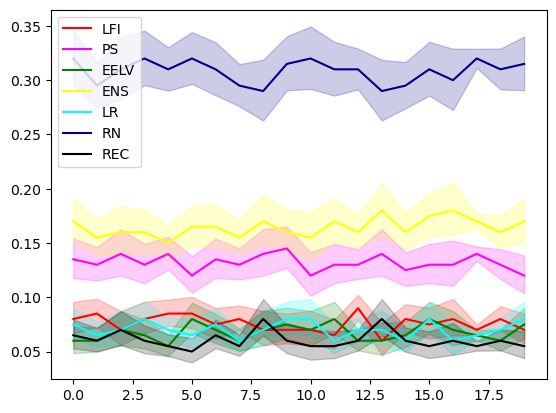

In [204]:

plt.plot(lfi, label='LFI', c='red')
plt.fill_between( [i for i in range(len(lfi_inf))], lfi_inf, lfi_sup, alpha=0.2, color='red')
plt.plot(PS, label='PS', c='magenta')
plt.fill_between( [i for i in range(len(PS_inf))], PS_inf, PS_sup, alpha=0.2, color='magenta')
plt.plot(eelv, label='EELV', c='green')
plt.fill_between( [i for i in range(len(eelv_inf))], eelv_inf, eelv_sup, alpha=0.2, color='green')
plt.plot(ens, label='ENS', c='yellow')
plt.fill_between( [i for i in range(len(ens_inf))], ens_inf, ens_sup, alpha=0.2, color='yellow')
plt.plot(lr, label='LR', c='cyan')
plt.fill_between( [i for i in range(len(lr_inf))], lr_inf, lr_sup, alpha=0.2, color='cyan')
plt.plot(rn, label='RN', c='darkblue')
plt.fill_between( [i for i in range(len(rn_inf))], rn_inf, rn_sup, alpha=0.2, color='darkblue')
plt.plot(rec, label='REC', c='black')
plt.fill_between( [i for i in range(len(rec_inf))], rec_inf, rec_sup, alpha=0.2, color='black')



plt.legend( loc='upper left')

Text(0.5, 1.0, 'Points of evaluation and best 1D models for a 14-days ahead prediction')

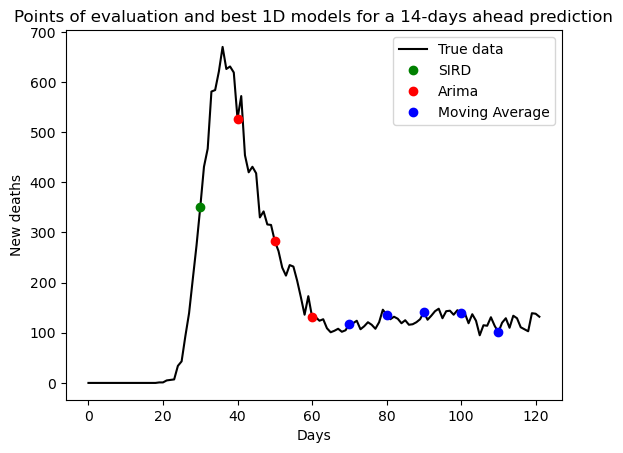

In [40]:
plt.plot(new_deaths, label='True data', c='black')
plt.plot([30], new_deaths[[30]], 'go', label= 'SIRD')

plt.plot([ 40, 50, 60], new_deaths[[ 40, 50, 60]], 'ro', label='Arima')
plt.plot( [70, 80, 90, 100,   110], new_deaths[ [70, 80, 90, 100,  110]], 'bo', label= 'Moving Average')
plt.legend()
plt.xlabel('Days')
plt.ylabel('New deaths')
plt.title('Points of evaluation and best 1D models for a 14-days ahead prediction')

Text(0.5, 1.0, 'Points of evaluation and best 3D models for a 7-days ahead prediction')

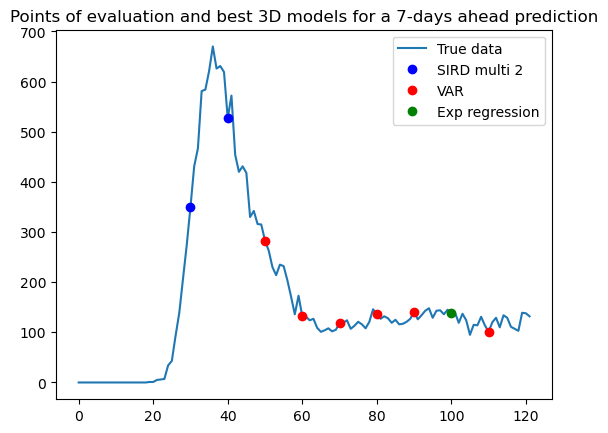

In [21]:
plt.plot(new_deaths, label='True data')
plt.plot([30, 40], new_deaths[[30, 40]], 'bo', label='SIRD multi 2')
plt.plot( [50, 60, 70, 80, 90,  110], new_deaths[ [50, 60, 70, 80, 90,  110]], 'ro', label= 'VAR')
plt.plot([100], new_deaths[[100]],'go',  label= 'Exp regression')
plt.legend()
plt.title('Points of evaluation and best 3D models for a 7-days ahead prediction')

Text(0.5, 1.0, 'Points of evaluation and best models for a 14-days ahead prediction')

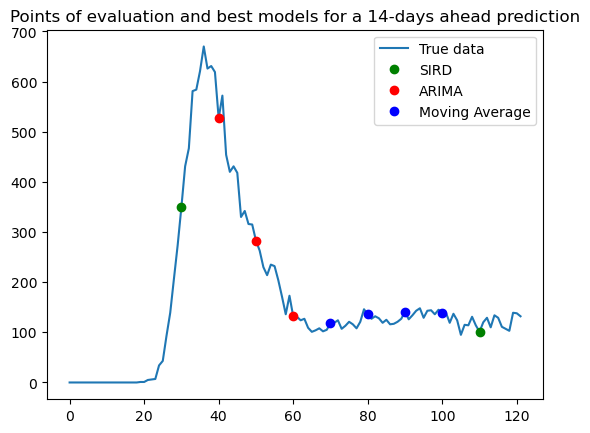

In [8]:
plt.plot(new_deaths, label='True data')
plt.plot([30, 110], new_deaths[[30,110]],'go',   label='SIRD')
plt.plot([ 40, 50, 60], new_deaths[[ 40, 50, 60]], 'ro', label='ARIMA')
plt.plot( [70, 80, 90, 100], new_deaths[ [70, 80, 90, 100]], 'bo', label= 'Moving Average')
plt.legend()
plt.title('Points of evaluation and best models for a 14-days ahead prediction')

In [9]:
# load results: 
import json
import numpy as np
import matplotlib.pyplot as plt
models1D=['SIRD', 'ExponentialRegression', 'MovingAverage', 'Arima', 'SIRD2']

with open('comparing_models_1D_reach=7.json', 'r') as f:
    dicoresults = json.load(f)
best_models_1D_7=[models1D[np.argmin(dicoresults[point])] for point in dicoresults.keys()]

with open('comparing_models_1D_reach=14.json', 'r') as f:
    dicoresults = json.load(f)
models1D=['SIRD', 'ExponentialRegression', 'MovingAverage', 'Arima', 'SIRD2']
best_models_1D_14=[models1D[np.argmin(dicoresults[point])] for point in dicoresults.keys()]

In [10]:
print(best_models_1D_14)
print(best_models_1D_7)
print(best_models_3D_14)
print(best_models_3D_7)

['Arima', 'MovingAverage', 'Arima', 'SIRD', 'SIRD', 'SIRD', 'Arima', 'MovingAverage', 'MovingAverage', 'MovingAverage', 'MovingAverage', 'MovingAverage', 'MovingAverage', 'MovingAverage', 'MovingAverage', 'MovingAverage', 'SIRD']
['Arima', 'Arima', 'Arima', 'SIRD', 'Arima', 'SIRD', 'SIRD', 'MovingAverage', 'MovingAverage', 'MovingAverage', 'MovingAverage', 'MovingAverage', 'MovingAverage', 'MovingAverage', 'MovingAverage', 'MovingAverage', 'MovingAverage']


NameError: name 'best_models_3D_14' is not defined

In [ ]:
models3D=['SIRD', 'ExponentialRegression', 'MovingAverage', 'Arima']
with open('comparing_models_3D_reach=7.json', 'r') as f:
    dicoresults = json.load(f)
best_models_3D_7=[models3D[np.argmin(dicoresults[point])] for point in dicoresults.keys()]

with open('comparing_models_3D_reach=14.json', 'r') as f:
    dicoresults = json.load(f)
best_models_3D_14=[models3D[np.argmin(dicoresults[point])] for point in dicoresults.keys()]

In [ ]:
indexs_points=[[30],[35], [40], [45], [50],[55], [60],[65],  [70],[75],  [80],[85], [90],[95], [100],[105] , [110]]


In [ ]:
colours=['bo', 'ro', 'mo', 'go', 'co']

In [ ]:

models=['SIRD', 'ExponentialRegression', 'MovingAverage', 'Arima', 'SIRD2']

coloursdico=dict()
for i in range(len(models)): 
    coloursdico[models[i]]=colours[i]

aaaaaaaaaaaa
MovingAverage
SIRD
Arima


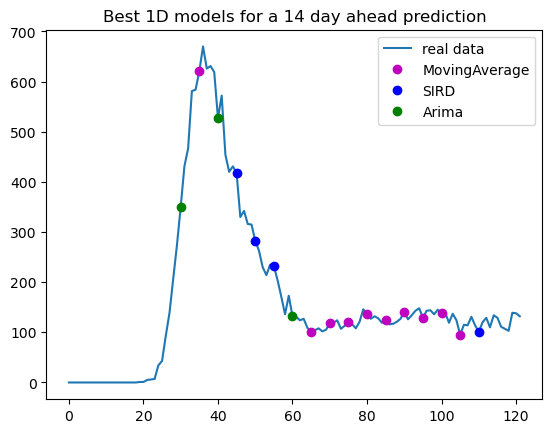

aaaaaaaaaaaa
MovingAverage
SIRD
Arima


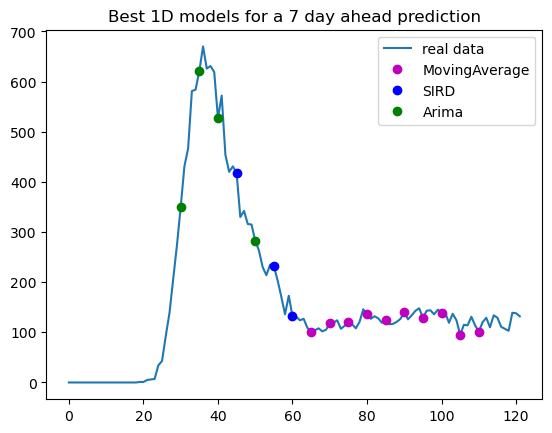

aaaaaaaaaaaa
SIRD
Arima


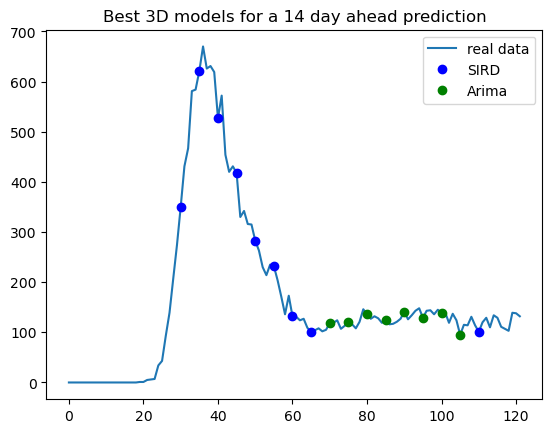

aaaaaaaaaaaa
ExponentialRegression
SIRD
Arima


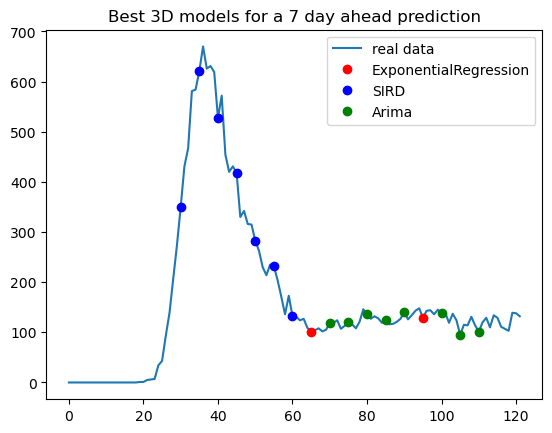

In [ ]:
def plot_best_models(best_models, indexs_points, title):
    plt.plot(new_deaths, label='real data')
    for i in range (len(list(set(best_models)))): 
        model = list(set(best_models))[i]
        print(model)
        colour=coloursdico[model]
        list_of_points=[]
        for j in range(len(best_models)): 
            if best_models[j]==model: 
                list_of_points.append(indexs_points[j])
        plt.plot(list_of_points, new_deaths[list_of_points], colour, label=model)
    plt.legend()
    plt.title(title)
    plt.show()
print('aaaaaaaaaaaa')
plot_best_models(best_models_1D_14, indexs_points, 'Best 1D models for a 14 day ahead prediction')
print('aaaaaaaaaaaa')

plot_best_models(best_models_1D_7, indexs_points, 'Best 1D models for a 7 day ahead prediction')
print('aaaaaaaaaaaa')

plot_best_models(best_models_3D_14, indexs_points, 'Best 3D models for a 14 day ahead prediction')
print('aaaaaaaaaaaa')

plot_best_models(best_models_3D_7, indexs_points, 'Best 3D models for a 7 day ahead prediction')
    